# Segmentasi Gambar menggunkan Color Space di OpenCV

<p>2006043 : Ade Iskandar Zulkarnaen</p>
<p>1906062 : Dzikri Nursyaban</p>

<p>
Pada sesi ini, Anda akan membahas bagaimana cara melakukan segmentasi object dari gambar berdasarkan warna dengan menggunakan library OpenCV.
</p>

## Import library yang dibutuhkan

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

In [4]:
# upload file
from google.colab import files  
files = files.upload()

In [ ]:
# unzip file
!unzip "/content/images.zip" ;

## Menampilkan Gambar
OpenCV secara default membaca gambar dalam format BGR.

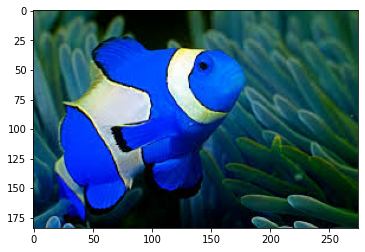

In [6]:
# OpenCV by default opens images in BGR color space

nemo = cv2.imread("./images/nemo0.jpg")
plt.imshow(nemo)
plt.show()

kit bisa menggunakan fungsi `cvtColor(image, flag`) untuk merubah formatnya ke dalam format RGB.

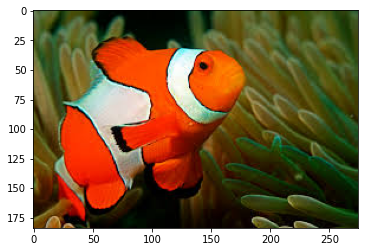

In [7]:
# transform images format from BGR to RGB 

nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

## Memvisualisasikan Gambar dalam Ruang Warna RGB dan HSV
visualisasi ini merupakan kunci utama yang dapat dimanfaatkan untuk melakukan segmentasi. Dengan visualisasi ini kita bisa melihat distribusi pixel warna pada gambar.



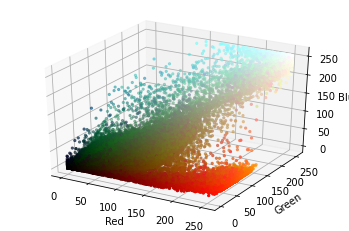

In [8]:
# Generating the colored 3D scatter Plot for the Image in RGB

r, g, b = cv2.split(nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

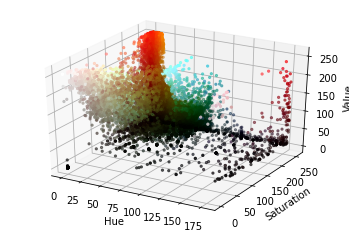

In [9]:
# Generating the colored 3D scatter Plot for the Image in HSV

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_nemo)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Melakukan Segmentasi Gambar (orange - first mask)

### Pemilihan warna (orange)

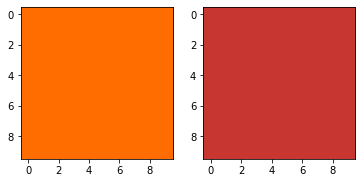

In [10]:
# Picking Out a Range
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Displaying the HSV Colors Chosen
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

<!-- ### segmentation process and build fisrt mask -->

### process segmentasi dan build-mask

Untuk memasangan *mask* di atas *original image*, kita bisa menggunakan `cv2.bitwise_and()`, yang menyimpan setiap piksel dalam gambar yang diberikan jika nilai yang sesuai dalam *mask* adalah 1:


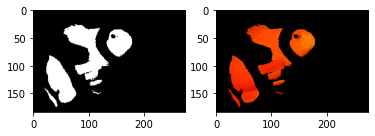

In [11]:
# Segment Image using inRange() function
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(nemo, nemo, mask=mask)

# view mask and the original image
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Melakukan Segmentasi Gambar (white - second mask)

### Pemilihan warna (white)

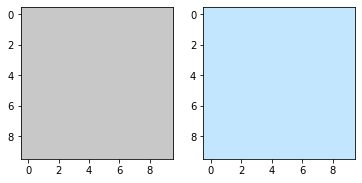

In [12]:
# Picking Out a Range
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

# Displaying the HSV Colors Chosen
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

### process segmentasi dan build-mask
<!-- You can build a second mask the same way as you did the first: -->

kita dapat membuat mask-kedua dengan cara yang sama seperti yang pertama:

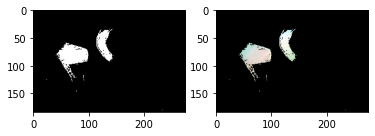

In [13]:
# Segment Image using inRange() function
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)

# Bitwise-AND mask and original image
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

# view mask and the original image
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

## Menambahkan mask bersama dan plot hasilnya

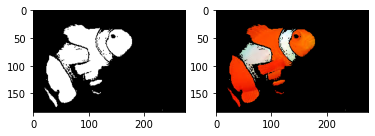

In [14]:
# add the masks together and plot the results:

final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

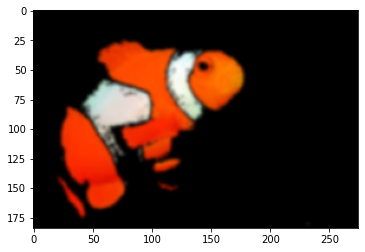

In [15]:
# Here’s what applying the blur looks like for our image:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)

plt.imshow(blur)
plt.show()

## Generalisasi segmentasi

In [ ]:
# Does This Segmentation Generalize to Nemo’s Relatives?

path = "./images/nemo"

nemos_friends = []
for i in range(6):
    friend = cv2.cvtColor(
        cv2.imread(path + str(i) + ".jpg"), cv2.COLOR_BGR2RGB
    )
    nemos_friends.append(friend)

In [ ]:
# the segment fish function
def segment_fish(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    result = cv2.GaussianBlur(result, (7, 7), 0)
    return result

## Melihat semua gambar hasil segmentasi

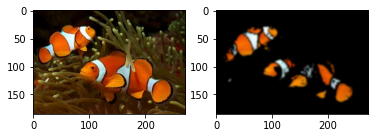

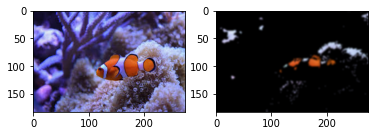

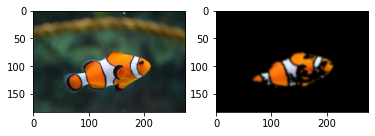

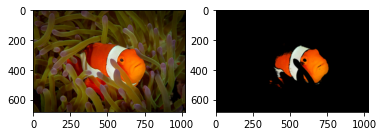

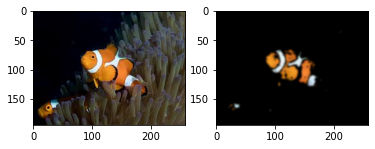

In [ ]:
# view all the results by plotting them in a loop:
results = [segment_fish(friend) for friend in nemos_friends]

for i in range(1, 6):
    plt.subplot(1, 2, 1)
    plt.imshow(nemos_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()